In [21]:
#Importación de paquetes
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
from Machine_Learning_Tools.plots import barplot,boxplot1,correlogram,pairplot
from Machine_Learning_Tools.models import Supervised_Model,multi_layer_perceptron
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from scipy.stats.distributions import uniform
import pandas as pd
import datetime
import numpy as np
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Análsis del dataset**

In [3]:
#carga del dataset
df = pd.read_csv('datasets/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Hay un total de 6435 observaciones y además tenemos un total de 8 columnas, 5 de tipo float64, 2 de tipo int64 y una de tipo object. La columna **Date** es una fecha, es mejor cambiar su tipo a datetime. 

In [4]:
df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y')

In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No hay datos faltantes

Creamos una columna llamada ''month'' con el mes de la fecha correspondiente y despues creamos variables dummies a partir de esta 

In [7]:
df['month'] = df.Date.dt.month

In [8]:
# Dividimos la variable Weekly_Sales entre 1,000,000
df['Weekly_Sales_millions'] = df['Weekly_Sales']/1000000

In [9]:
# Dividimos las variables en númericas y categóricas
numeric_features = ['Weekly_Sales_millions','Temperature','Fuel_Price','CPI','Unemployment']

categorical_features = ['Holiday_Flag','month']

# **Análisis descriptivo**

Generamos un pairplot y un correlograma de las variables númericas

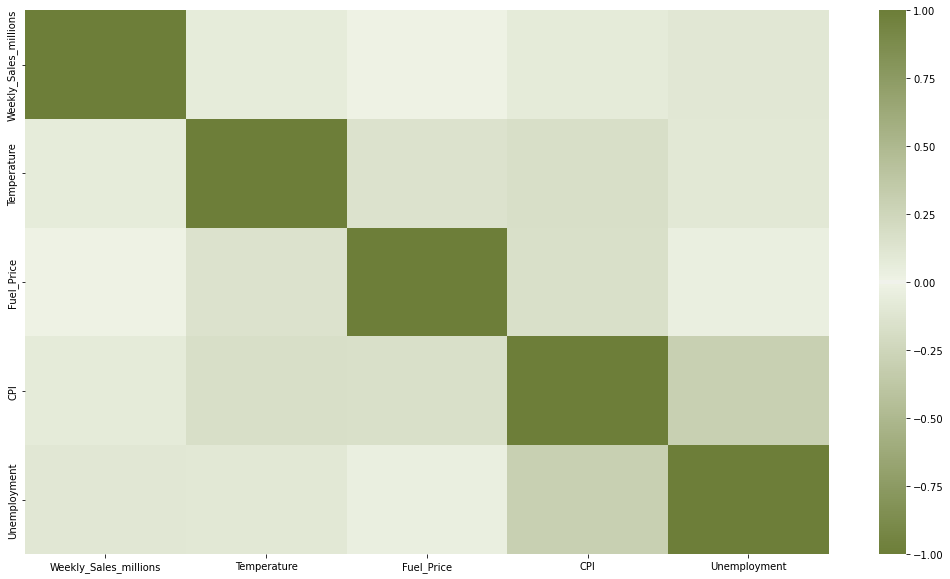

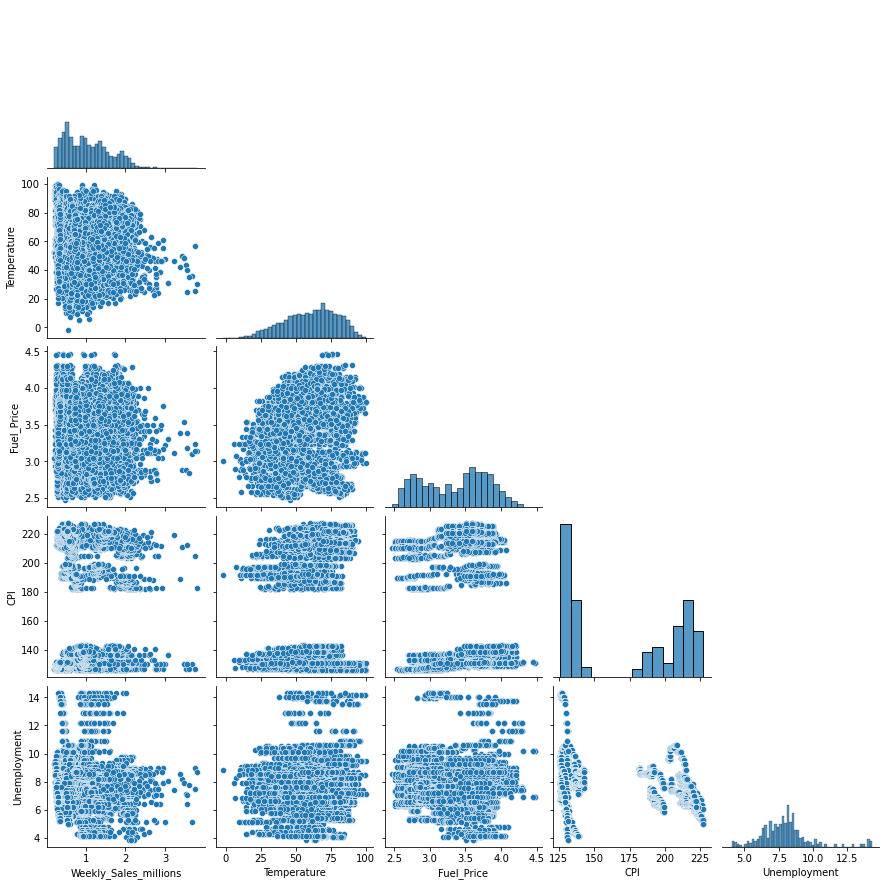

In [12]:
# Correlograma de las variables numericas
correlogram(df,numeric_features,h_neg=100,h_pos=100,figsize=(18,10))

#Paiplot de las variables numericas
pairplot(df,numeric_features)

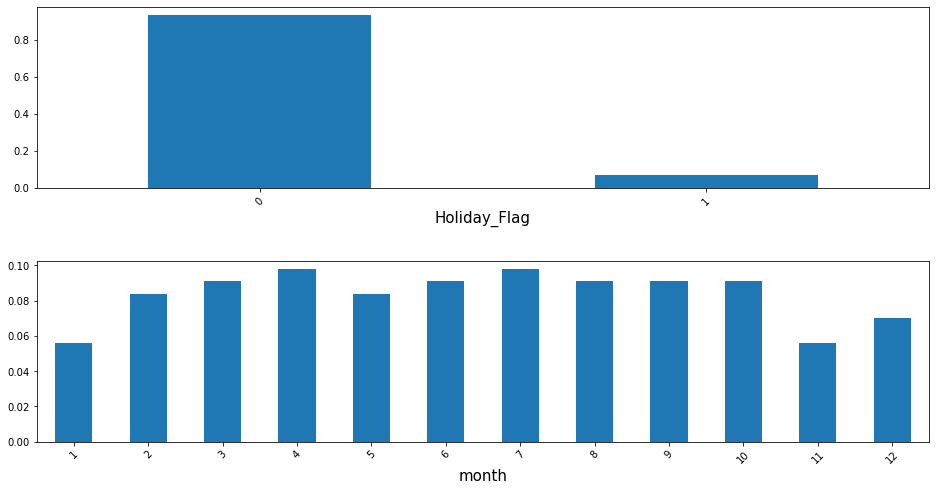

In [15]:
# barplot de las variables categóricas
barplot(df,categorical_features,2,1,figsize=(16,8))

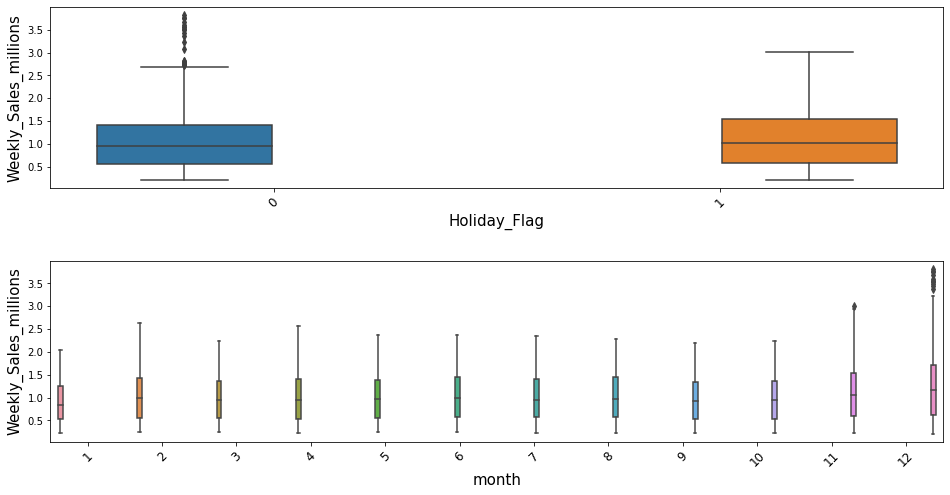

In [16]:
boxplot1(df,'Weekly_Sales_millions',categorical_features,2,1,figsize=(16,8),label_size=15,xticks_size=12)

# **Preprocesamiento de datos y definición de los modelos**

In [23]:
# escalador y onehotencoder para las variables categóricas
scaler = RobustScaler()

encoder = OneHotEncoder(drop='first')

features_transformer = ColumnTransformer([
    ('numeric',scaler,numeric_features[1:]),
    ('categorical',encoder,categorical_features)
])


# Modelo para la eleccion de variables

model_sel = DecisionTreeRegressor()


feature_selector = SelectFromModel(estimator=model_sel,threshold=0.1)


In [26]:
#Definimos las variables predictora y las variables respuesta
df = df.drop(['Store','Date','Weekly_Sales'],axis=1)
features = df.columns[df.columns!='Weekly_Sales_millions']
target = ['Weekly_Sales_millions'] 

In [24]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,Weekly_Sales_millions
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,1.643691
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,1.641957
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,1.611968
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,1.409728
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,1.554807
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,0.713174
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,0.733455
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,0.734464
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,0.718126


# Entrenamiento de la red neuronal

# **Elección de variables**

/tmp/ipykernel_7786/882238293.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_final.columns[:-1],rotation=90)


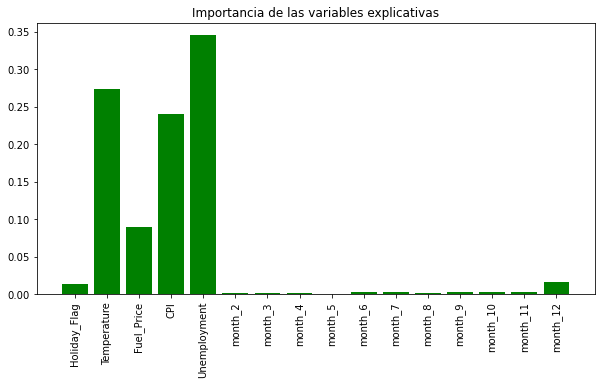

In [12]:
# Ajustamos un desicion tree y encontramos las variables más significativas

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X,y)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(x=df_final.columns[:-1],height=decision_tree.feature_importances_,color='g')
ax.set_xticklabels(df_final.columns[:-1],rotation=90)
ax.set_title('Importancia de las variables explicativas')
plt.show()

Para el modelo utilizaremos las varibles con una importnacia mayor a 0.1

In [13]:
X_new = X[:,decision_tree.feature_importances_>0.1]

#Revolvemos el dataset

#Fijamos una semilla
np.random.seed(190)

sample = np.random.choice(X_new.shape[0],X_new.shape[0])

X_new = X_new[sample,:]

# **Análisis de PCA**

In [14]:
pca = PCA()
pca.fit(X_new)
X_pca = pca.transform(X_new)
pca.explained_variance_ratio_.cumsum()

array([0.72291634, 0.88494993, 1.        ])

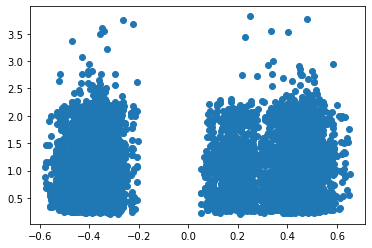

In [32]:
plt.scatter(X_pca[:,0],y)
plt.show()

# **Modelo de regresión lineal**

In [17]:
lr_model = LinearRegression()

#Validación cruzada para determinar el score del modelo

lr_cv_mse = -cross_val_score(lr_model,X_new,y,cv=10,scoring='neg_mean_squared_error').mean()

print('Linear Regression Model, CV MSE: {:.4f}'.format(lr_cv_mse))

Linear Regression Model, CV MSE: 0.3406


# **Random Forest**

In [17]:
#AJustamos el modelo con 100 árboles
rf_model = RandomForestRegressor(n_estimators=100)

#Validación cruzada para determinar el score del modelo

rf_cv_mse = -cross_val_score(rf_model,X_new,y,cv=10,scoring='neg_mean_squared_error').mean()

print('Random Forest Model, CV MSE: {:.4f}'.format(rf_cv_mse))

Random Forest Model, CV MSE: 0.4404


# **Neural Network**

In [51]:
#función para crear el modelo

n_inputs = X_new.shape[1]
lr = 0.1
opt = optimizers.SGD(lr)
loss = losses.MeanSquaredError()

def NeuralNetwork(nn=10,nl=1,act='relu',out_act='linear'):
    
    model = Sequential()
    model.add(layers.Dense(nn,act,input_shape=(n_inputs,)))
    
    for i in range(nl-1):
        
        model.add(layers.Dense(nn,act))
        
    model.add(layers.Dense(1,out_act))
    
    model.compile(optimizer=opt,loss=loss)
    
    return model

In [79]:
out_act = 'exponential'
nn = 10
nl = 2
act = 'relu'
nn_model = NeuralNetwork

In [80]:
epochs = 50
batch_size = 32
nn_model = KerasRegressor(nn_model,epochs=epochs,batch_size=batch_size,nn=nn,nl=nl,act=act,out_act=out_act)

In [82]:
#Validación cruzada para determinar el score del modelo

nn_cv_mse = -cross_val_score(nn_model,X_new,y,cv=10,scoring='neg_mean_squared_error').mean()

print('Neural Network Model, CV MSE: {:.4f}'.format(nn_cv_mse))

Epoch 1/50
181/181 [==============================] - 5s 17ms/step - loss: 0.3084
Epoch 2/50
181/181 [==============================] - 3s 18ms/step - loss: 0.2902
Epoch 3/50
181/181 [==============================] - 4s 20ms/step - loss: 0.2846
Epoch 4/50
181/181 [==============================] - 3s 16ms/step - loss: 0.2761
Epoch 5/50
181/181 [==============================] - 4s 20ms/step - loss: 0.2902
Epoch 6/50
181/181 [==============================] - 3s 19ms/step - loss: 0.2841
Epoch 7/50
181/181 [==============================] - 4s 20ms/step - loss: 0.2822
Epoch 8/50
181/181 [==============================] - 3s 19ms/step - loss: 0.2875
Epoch 9/50
181/181 [==============================] - 3s 19ms/step - loss: 0.2732
Epoch 10/50
181/181 [==============================] - 3s 16ms/step - loss: 0.2797
Epoch 11/50
181/181 [==============================] - 3s 19ms/step - loss: 0.2844
Epoch 12/50
181/181 [==============================] - 3s 19ms/step - loss: 0.2807
Epoch 13/50
1